#### Luca Mattiazzi 709638

# Tecniche di Analisi Multivariata


## Introduzione

Questa relazione si propone di illustrare tecniche di analisi statistica multivariata applicata a Wines, un dataset che racchiude i dati ottenuti del campionamento del terreno di coltivazione e l’analisi qualità di diversi vini.

Di ogni terreno è stata analizzata la concentrazione di 17 diversi elementi, le variabili indipendenti, ed è stato ottenuto l’aroma del vino prodotto, una variabile dipendente, che rappresenta con un valore da 1 a 10 le proprietà organolettiche date da un sommelier.

L’aroma suddivide inoltre gli oggetti in 2 classi, quella dei vini con valore inferiore a 5 e quella dei vini con valore superiore a 5: ci si interroga se esista una correlazione tra le variabili indipendenti e l’aroma, e quindi l’appartenenza ad una delle due classi, e se sia possibile costruire un modello predittivo della variabile dipendente a partire dai soli valori di tutte, o solo alcune, variabili indipendenti.

## Preparazione dei dati

La prima parte del lavoro consiste nell’analisi “classica” dei dati, ovvero nell’affrontare con metodi non multivariati i dati in nostro possesso per estrarre informazione utile all’obbiettivo finale. 

Prima di fare questo però è opportuno trattare i dati in nostro possesso.
Questo è un estratto dei valori del dataset WINES:

In [289]:
import pandas as pd
import matplotlib as plt
from sklearn.preprocessing import StandardScaler, scale
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df = pd.read_csv("./tam.csv", delimiter=";")
df = df.drop("#", axis=1)
df.head()

,Cd,Mo,Mn,Ni,Cu,Al,Ba,Cr,Sr,Pb,B,Mg,Si,Na,Ca,P,K,Aroma,Class
0,0.005,0.044,1.510,0.122,0.830,0.982,0.387,0.029,1.230,0.561,2.630,128.000,17.300,66.800,80.500,150.000,1130,3.800,1
1,0.055,0.160,1.160,0.149,0.066,1.020,0.312,0.038,0.975,0.697,6.210,193.000,19.700,53.300,75.000,118.000,1010,4.400,1
2,0.056,0.146,1.100,0.088,0.643,1.290,0.308,0.035,1.140,0.730,3.050,127.000,15.800,35.400,91.000,161.000,1160,3.900,1
3,0.063,0.191,0.959,0.380,0.133,1.050,0.165,0.036,0.927,0.796,2.570,112.000,13.400,27.500,93.600,120.000,924,3.900,1
4,0.011,0.363,1.380,0.160,0.051,1.320,0.380,0.059,1.130,1.730,3.070,138.000,16.700,76.600,84.600,164.000,1090,5.600,2


La tabella dei valori completa è presente alla fine del documento.

I valori grezzi ottenuti dalle misurazioni devono essere trasformati prima di poter essere utilizzati o anche solamente visualizzati assieme, questo perché alcuni elementi sono presenti in quantità che sono ordini di grandezza superiore ad altre, e questo renderebbe impossibile comparare due variabili su diversi campioni.

### Scaling

Si risolve questo problema applicando lo scaling dei dati, una classe di trasformazioni reversibili che ci consentono di rendere paragonabili i domini di variabili diverse, sostituendo i valori originali delle misurazioni con valori che mantengono invariati i rapporti all’interno della stessa variabile, ma cambiano quelli tra variabili diverse.

I metodi che vedremo fanno uso di due indici molto comuni usati per descrivere alcune proprietà di un dataset, la media aritmetica e la deviazione standard.

La media aritmetica si ottiene sommando tutti i valori di una variabile e dividendo il risultato per il numero di osservazioni: questo ci restituisce un numero che, in alcune situazioni, ci consente di farci un’idea del valore intorno al quale una variabile tende a ritrovarsi.

La deviazione standard si ottiene invece sommando il quadrato delle differenze, per ogni osservazione, tra la misurazione e la media aritmetica della variabile. Questa somma viene poi divisa per il numero totale di osservazioni e se ne estrae la radice quadrata. Il valore ottenuto rappresenta quanto la distribuzione di valori della variabile tende ad allontanarsi dalla media aritmetica. 

Questi due parametri definiscono proprietà importanti di una variabile, più avanti vedremo come ci permettano di trarre informazioni primitive dai nostri dati.

Di seguito elenchiamo alcuni metodi di scaling che usano questi due descrittori (per tutte: x’ rappresenta il nuovo valore scalato):


#### Centratura

$$
x' = x - \overline{x}
$$

Questo metodo serve per centrare sull’origine la distribuzione dei valori della variabile: è infatti facile intuire che la media dei nuovi valori scalati sarà pari a 0; non cambia invece la deviazione standard.

#### Varianza unitaria

$$
x' = \frac{x}{\sigma} 
$$
Come dice il nome stesso, trasforma la deviazione standard dei valori scalati per portarla ad 1, e poiché applica una divisione ad ogni valore, anche la media risulterà divisa per lo stesso valore.

#### Auto scaling

$$
x' = \frac{x - \overline{x}}{\sigma}
$$

Questa tecnica è una delle più utilizzate, ed è la combinazione delle due formule sopra descritte: la media dei valori scalati è pari a 0, e deviazione standard e varianza sono pari ad 1.

#### Scaling al valore massimo

$$
x' = \frac{x}{max(x)}
$$

Si dividono tutti i valori per il valore massimo assunto dalla variabile in questione in modo che il valore massimo della variabile risulti pari a 1.

#### Scaling a intervallo

$$
x' = \frac{x - min(x)}{max(x) - min(x)}
$$

Come nel caso precedente, il valore massimo della variabile scalata risulterà pari ad 1, ma in questo caso il valore minimo risulterà 0. Questo consente di scalare qualsiasi variabile al dominio \[0, 1\].


Nel nostro caso, qualora decidessimo di procedere ad utilizzare i valori che abbiamo senza applicare alcuna trasformazione, rischieremmo di dare troppa importanza ad alcune misurazioni per le quali il valore assoluto è decisamente più alto rispetto ad altre (vedi Magnesio e Cadmio, che differiscono di diversi ordini di grandezza), nonostante questo possa in realtà non avere importanza ai nostri fini.

Per questo applichiamo auto scaling alle nostre variabili indipendenti, evitando di trasformare la variabile dipendente, in quanto si tratta del nostro output, e la classe, che rappresenta in realtà una variabile categorica e che quindi non ha senso assuma valori diversi da quelli che possiede.

### Analisi dei dati univariata

Una prima analisi che possiamo effettuare sui dati in nostro possesso è il calcolo e la visualizzazione delle medie e delle deviazioni standard dei campioni, controllando se esista qualche differenza tra le due classi.

#### Media e Deviazione Standard

Di seguito vediamo media e deviazione standard per tutti i campioni:

In [290]:
df_1 = df[df["Class"] == 1]
df_2 = df[df["Class"] == 2]

def get_desc(df0, classes_to_remove = ["Class", "Aroma"]):
    means = df0.drop(classes_to_remove, axis=1).mean().values
    stds = df0.drop(classes_to_remove, axis=1).std().values
    rows = df0.drop(classes_to_remove, axis=1).columns
    df_desc = pd.DataFrame(list(zip(means, stds)), index=rows, columns=["mean", "std"])
    return df_desc

get_desc(df).transpose()

,Cd,Mo,Mn,Ni,Cu,Al,Ba,Cr,Sr,Pb,B,Mg,Si,Na,Ca,P,K
mean,0.052,0.172,1.691,0.104,0.171,0.874,0.231,0.044,0.899,0.839,4.728,129.450,14.331,41.839,76.287,156.171,1119.237
std,0.025,0.099,0.649,0.085,0.196,0.403,0.105,0.020,0.550,0.475,1.648,32.048,8.557,30.524,19.085,33.799,195.046


Questi sono invece i valori solo per la classe 1:

In [291]:
get_desc(df_1).transpose()

,Cd,Mo,Mn,Ni,Cu,Al,Ba,Cr,Sr,Pb,B,Mg,Si,Na,Ca,P,K
mean,0.050,0.152,1.665,0.108,0.173,0.924,0.273,0.044,1.158,0.745,4.446,143.213,15.931,50.257,81.487,156.370,1177.957
std,0.026,0.100,0.608,0.070,0.231,0.388,0.079,0.024,0.493,0.475,1.774,30.359,7.843,32.813,19.282,40.114,202.049


Questi quelli per la classe 2:

In [292]:
get_desc(df_2).transpose()

,Cd,Mo,Mn,Ni,Cu,Al,Ba,Cr,Sr,Pb,B,Mg,Si,Na,Ca,P,K
mean,0.056,0.203,1.730,0.099,0.166,0.797,0.166,0.044,0.501,0.984,5.161,108.347,11.877,28.933,68.313,155.867,1029.200
std,0.025,0.093,0.727,0.107,0.134,0.425,0.110,0.014,0.370,0.451,1.380,21.857,9.285,21.809,16.305,22.145,148.457


Possiamo quindi vedere la percentuale di differenza tra le medie delle variabili nella classe 1 e la classe 2 per farci un'idea di quali siano quelle che potrebbero impattare di più l'appartenenza ad una classe.

In [293]:
vals =100 * (get_desc(df_2)["mean"] - get_desc(df_1)["mean"]) / get_desc(df_1)["mean"]
pd.DataFrame(vals.values, index=vals.index, columns=["delta"]).transpose()

,Cd,Mo,Mn,Ni,Cu,Al,Ba,Cr,Sr,Pb,B,Mg,Si,Na,Ca,P,K
delta,11.842,33.404,3.917,-8.347,-4.095,-13.821,-39.121,0.386,-56.730,31.995,16.083,-24.346,-25.451,-42.429,-16.167,-0.322,-12.628


Ad una prima analisi superficiale, quindi, sembrerebbe che Sr, Na e Ba siano i tre elementi con maggiore differenza tra le due classi; basandoci però sulla media aritmetica, ed avendo un numero limitato di valori, un singolo outlier potrebbe cambiare drasticamente questo risultato, che possiamo usare solo come suggerimento per il resto dell'analisi.

#### Dati scalati

Possiamo quindi passare a visualizzare i dati che abbiamo con dei grafici univariati. Questi non ci consentiranno di avere informazioni circa il rapporto tra diverse variabili, ma solo come si comporta la singola variabile.

In particolare, per osservare la distribuzione di una variabile, risulta molto efficace l'uso del violin plot con un box plot: il primo serve a visualizzare qualitativamente quanto certi valori siano più rappresentati, il secondo invece mostra i quantili della distribuzione.

Come prima cosa però, applichiamo autoscaling alle nostre variabili, in quanto sarebbe impossibile visualizzarne le caratteristiche correttamente se mantenessero i loro valori originali, di ordini di grandezza troppo diversi per essere paragonabili.

Questo è un estratto dal dataset normalizzato:

In [232]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df.drop(["Class", "Aroma"], axis=1))
scaled_df = pd.DataFrame(data= scaled,
                     columns= df.drop(["Class", "Aroma"], axis=1).columns)
scaled_df = scaled_df.assign(Class=df["Class"].values, Aroma=df["Aroma"].values)
scaled_df.head()


,Cd,Mo,Mn,Ni,Cu,Al,Ba,Cr,Sr,Pb,B,Mg,Si,Na,Ca,P,K,Class,Aroma
0,-1.918949,-1.306177,-0.282558,0.213106,3.401380,0.271849,1.507856,-0.733007,0.610864,-0.594113,-1.289804,-0.045852,0.351641,0.828710,0.223718,-0.185030,0.055924,1,3.8
1,0.102117,-0.121480,-0.829178,0.534645,-0.539746,0.367500,0.784511,-0.282128,0.140707,-0.303715,0.911211,2.009581,0.635871,0.380499,-0.068331,-1.144505,-0.567576,1,4.4
2,0.142538,-0.264461,-0.922885,-0.191795,2.436732,1.047123,0.745933,-0.432421,0.444926,-0.233251,-1.031584,-0.077474,0.173997,-0.213796,0.781267,0.144789,0.211798,1,3.9
3,0.425488,0.195120,-1.143095,3.285591,-0.194124,0.443014,-0.633243,-0.382324,0.052207,-0.092323,-1.326692,-0.551805,-0.110233,-0.476082,0.919327,-1.084538,-1.014417,1,3.9
4,-1.676421,1.951740,-0.485588,0.665642,-0.617125,1.122637,1.440343,0.769921,0.426489,1.902028,-1.019288,0.270368,0.280583,1.154078,0.441428,0.234740,-0.151910,2,5.6


#### Violin Plot

Partendo da questi valori, possiamo plottare un violinplot suddiviso per classi che evidenzi i quartili:

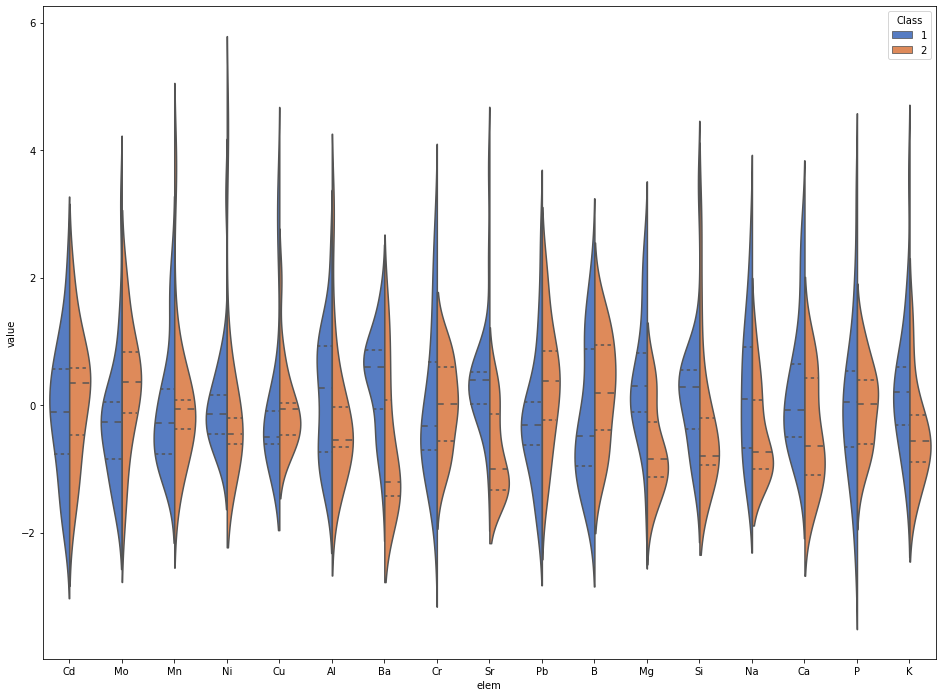

In [233]:
violin_df = scaled_df.drop(["Aroma"], axis=1).melt(id_vars=["Class"], var_name="elem")

plt.rcParams["figure.figsize"] = (16, 12)
ax = sns.violinplot(data=violin_df, x="elem", y="value", palette="muted", hue="Class", split=True, inner="quart", saturation=0.8)

In questo grafico possiamo vedere le distribuzioni dei dati per le due diverse classi a confronto per ogni elemento. Inoltre, grazie alla scalatura dei dati, possiamo vedere anche quali elementi abbiano una varianza maggiore. Le linee tratteggiate all'interno delle curve rappresentano il 25, 50 e 75 quantili, utili ad identificare la distribuzione dei dati.

Ad una prima vista, possiamo vedere come gli elementi Mo, Ba, Cr, Sr, Pb, Mg e Si spicchino per una distribuzione bimodale tra le due classi, il che potrebbe portarci a considerarli importanti. Inoltre vediamo come alcuni valori, Cu su tutti, sembrino avere pochissime differenze tra i campioni e tra le classi, indice che potrebbero essere poco influenti ai nostri fini.

### Analisi dei dati multivariata

Ora possiamo passare a fare un'analisi dei dati che prenda in considerazione più variabili a confronto.

#### Covarianza

La prima analisi che effettuiamo è il calcolo della covarianza tra le variabili; la covarianza è un valore numerico che rappresenta quanto due variabili tendino a variare assieme in campioni diversi.

$$
\sigma_xy = \frac{1}{N}\sum_{i=1}^N(x_i-\bar{x})(y_i-\bar{y})
$$

Il suo valore è la media dei prodotti, per ogni campione, degli scarti delle due variabili.
Dalla covarianza possiamo calcolare un indice di correlazione per costruire quella che si chiama Matrice di Correlazione: una matrice che rappresenta quanto tutte le variabili siano correlate tra di loro a coppie.

#### Matrice di Correlazione

Utilizziamo come indice la correlazione di Pearson, che assume valori che possono andare da -1 a 1; la correlazione sarà prossima a -1 in caso di variabili inversamente correlate, ad 1 in caso di variabili direttamente correlate, e intorno a 0 in caso di correlazione bassa o assente.

$$
\rho_xy = \frac{\sigma_xy}{\sigma_x \sigma_y}
$$

Poichè però utilizziamo valori autoscalati, che hanno quindi varianza pari ad 1, nel nostro caso la correlazione di Pearson risulta pari alla covarianza.

Bisogna sottolineare però che la correlazione di Pearson è in grado di rilevare solo relazioni lineari o perlomeno rappresentate da una funzione monotona e continua: due variabili possono invece avere un rapporto di correlazione diverso, ma l'indice potrebbe comunque risultare pari a 0 in quel caso; per questo, a parte un'analisi numerica più approfondita, l'uso di analisi visiva è molto importante.

In [240]:
scaled_df.corr()

,Cd,Mo,Mn,Ni,Cu,Al,Ba,Cr,Sr,Pb,B,Mg,Si,Na,Ca,P,K,Class,Aroma
Cd,1.000000,0.387288,0.211074,-0.153265,-0.276669,-0.270426,-0.086627,0.049327,-0.235029,0.435781,0.067614,-0.078256,-0.080028,-0.350229,0.015738,-0.347840,-0.173110,0.117286,0.155586
Mo,0.387288,1.000000,0.031148,0.248716,0.157126,-0.119070,-0.050280,0.322799,-0.179936,0.953185,-0.069154,0.147503,0.039903,-0.048653,0.386388,0.049826,-0.149033,0.253247,0.192684
Mn,0.211074,0.031148,1.000000,-0.354030,-0.186215,-0.317141,0.221955,0.292376,0.324642,0.048760,-0.093964,0.126852,-0.253333,-0.004088,-0.462975,0.033145,0.109756,0.049793,-0.042107
Ni,-0.153265,0.248716,-0.354030,1.000000,0.035182,-0.020910,0.147265,0.065477,0.097697,0.211290,-0.155883,0.212009,0.245321,-0.095851,0.415607,0.090940,-0.041910,-0.052304,-0.149241
Cu,-0.276669,0.157126,-0.186215,0.035182,1.000000,0.018643,-0.102281,0.055201,-0.143054,0.134463,-0.074970,-0.061960,0.043931,0.083411,0.208263,0.080720,-0.064300,-0.017906,-0.043860
Al,-0.270426,-0.119070,-0.317141,-0.020910,0.018643,1.000000,0.042516,-0.200346,-0.010016,-0.116082,-0.294855,-0.093687,-0.160575,0.248083,0.112279,-0.234147,-0.145241,-0.157200,-0.193075
Ba,-0.086627,-0.050280,0.221955,0.147265,-0.102281,0.042516,1.000000,0.090114,0.753368,0.043138,-0.270081,0.643365,0.360959,0.436218,0.219917,0.036176,0.503129,-0.503082,-0.608999
Cr,0.049327,0.322799,0.292376,0.065477,0.055201,-0.200346,0.090114,1.000000,0.377687,0.252112,0.040057,0.381289,0.060824,0.430039,0.066464,0.452505,0.496782,0.004117,-0.161042
Sr,-0.235029,-0.179936,0.324642,0.097697,-0.143054,-0.010016,0.753368,0.377687,1.000000,-0.166774,-0.326015,0.773298,0.160105,0.523053,0.179972,0.375574,0.616837,-0.592038,-0.761113
Pb,0.435781,0.953185,0.048760,0.211290,0.134463,-0.116082,0.043138,0.252112,-0.166774,1.000000,-0.156622,0.126275,0.068247,-0.077511,0.356255,0.032271,-0.167678,0.248824,0.170753


#### Heatmap di correlazione

Per rendere più semplice l'analisi della matrice ottenuta, possiamo visualizzare una heatmap della matrice stessa: si tratta di una matrice in cui il colore di ogni cella rappresenta il valore al suo interno, per evidenziare gli estremi -1 e 1 che ci interessano:

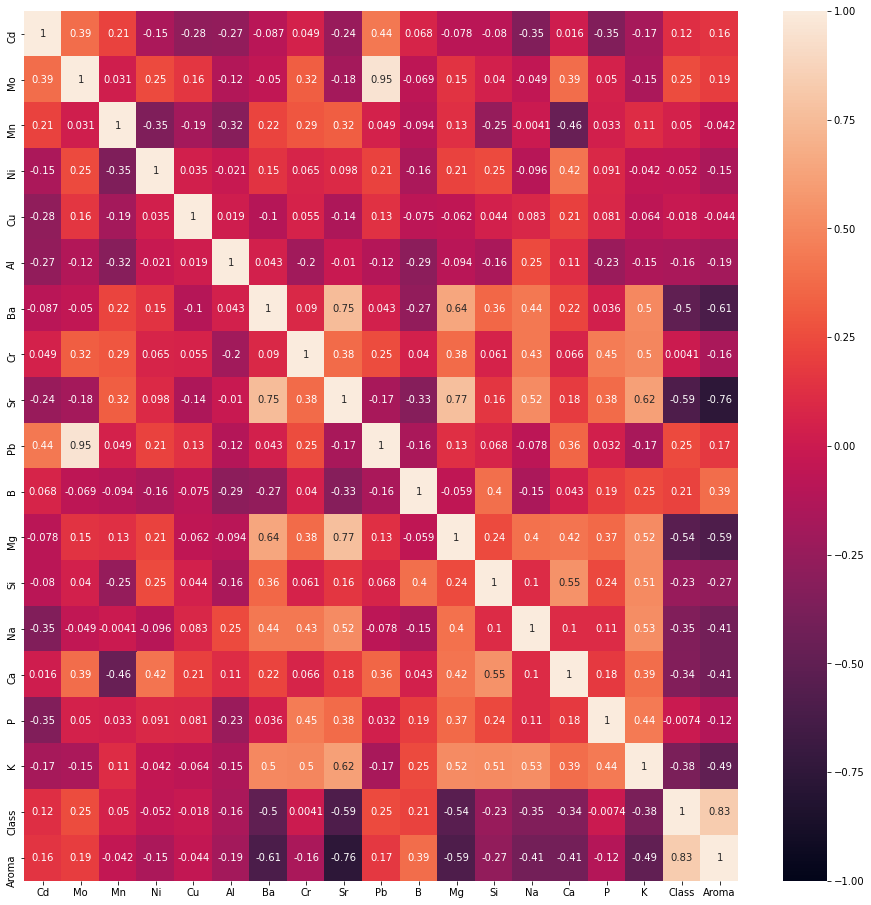

In [243]:
plt.rcParams["figure.figsize"] = (16, 16)
ax = sns.heatmap(scaled_df.corr(), annot=True, vmin=-1, vmax=1)

Possiamo subito identificare i valori maggiori e minori rappresentati dai colori molto chiari e molto scuri, e vediamo come Sr abbia una forte correlazione inversa con Aroma, come anche, in minor misura, Ba. Nessun elemento sembra aver una correlazione diretta con Aroma o Class.

#### Pairplot e Scatterplot

Per visualizzare facilmente i valori di due variabili per tutti i nostri campioni utilizziamo lo scatterplot. In uno scatterplot ad ogni punto corrisponde un campione, e le due coordinate rappresentano due variabili del dataset.

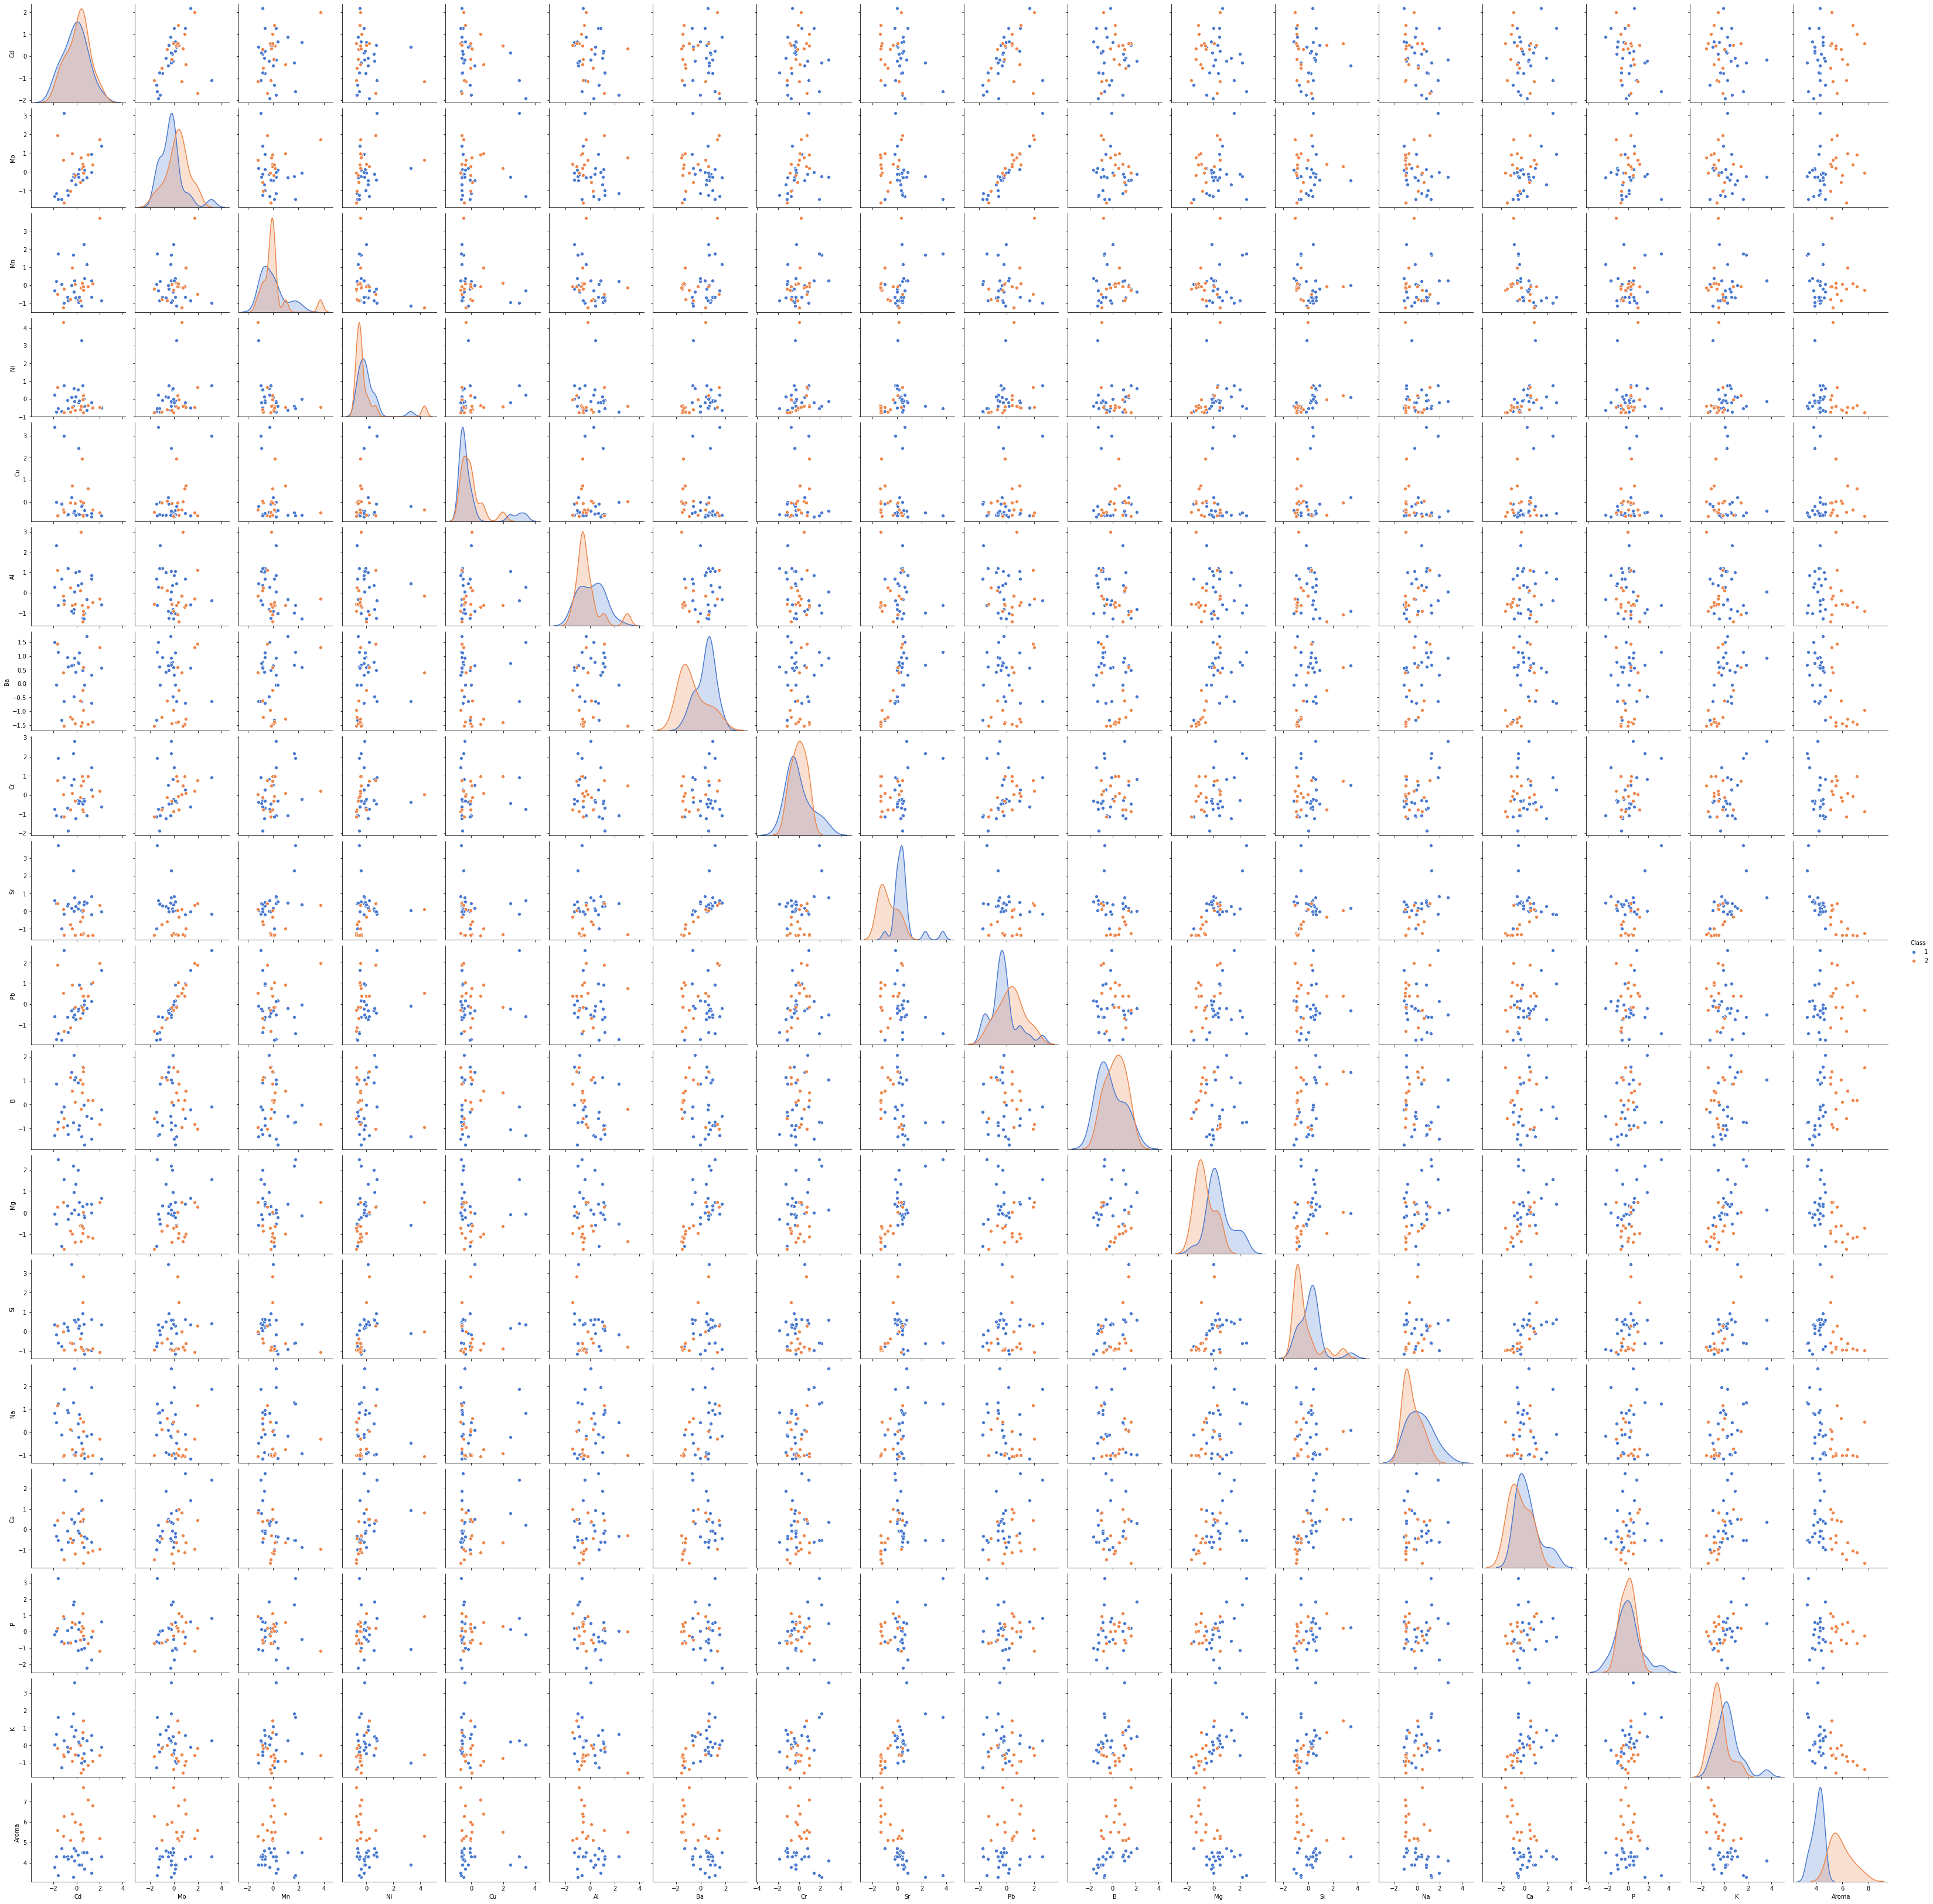

In [213]:
plt.rcParams["figure.figsize"] = (16, 16)
plt.interactive(False)
ax = sns.pairplot(scaled_df, hue="Class", palette="muted")

Quello che vediamo è un pairplot, una matrice che rappresenta, per ogni coppia di variabili, uno scatterplot, e lungo la diagonale la distribuzione dei valori per la variabile. In questo caso abbiamo anche separato le due classi per colore, in modo da evidenziare sia le differenze tra le distribuzioni all'interno di una variabile, sia tra due variabili diverse.

Lo scatterplot ci consente di confermare le correlazioni tra i dati ottenute nella matrice: possiamo infatti vedere che lo scatterplot tra Pb e Mo (0.95) mostri una chiara correlazione diretta: i punti nel grafico sembrano seguire una linea diagonale crescente.

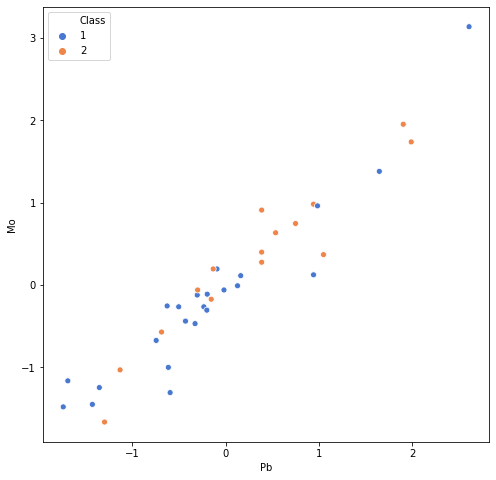

In [236]:
plt.rcParams["figure.figsize"] = (8, 8)
ax = sns.scatterplot(data=scaled_df, hue="Class", x="Pb", y="Mo", palette="muted")

Lo scatterplot ci conferma anche la correlazione inversa tra Aroma e Sr

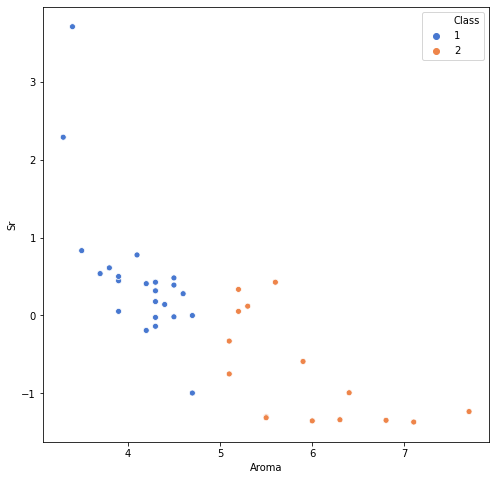

In [239]:
plt.rcParams["figure.figsize"] = (8, 8)
ax = sns.scatterplot(data=scaled_df, hue="Class", x="Aroma", y="Sr", palette="muted")

Lo scatterplot suggerisce, in aggiunta al valore della matrice, che la correlazione potrebbe non essere lineare, ma iperbolica; poichè l'iperbole, nonostante non sia lineare, è monotona, la correlazione di Pearson è in grado di identificarla.

Come Sr, anche Ba, Mg e K sono inversamente correlati con il valore di Aroma, anche se gli scatterplot sono meno evidenti; quello che si può apprezzare è come, negli scatterplot, sia molto raro trovare campioni di classe 2 (quindi con un valore di aroma alto) a coordinate in cui entrambe le variabili sono alte: questo suggerisce che alte concentrazioni di questi elementi siano, per la maggior parte dei casi, negative per l'aroma.

La presenza di una correlazione tra le due variabili non ci suggerisce la causa di tale correlazione: potrebbe semplicemente significare che i minerali che contengono Pb contengano anche Mo, e di conseguenza nei terreni in cui è presente l'uno si trova anche l'altro; o che tendono a fissarsi in terreni a pH simili, o a formare sali con altri elementi dei quali non abbiamo dati.

### PCA - Analisi delle Componenti Principali

#### Introduzione

L'analisi delle componenti principali è una tecnica utilizzata, tra le altre cose, per ridurre le dimensioni di un dataset; le dimensioni, o features, sono le colonne di un dataset. Ridurle significa perdere informazione circa il dataset stesso, di conseguenza l'applicazione della PCA si propone come obbiettivo quello di cercare di mantenere la maggior quantità di informazione utile all'utente nonostante la perdita di dimensioni.

Applicare la PCA porta all'identificazione di nuove dimensioni mediante un processo di rotazione della matrice dei dati, che prendono il nome di Componenti Principali (PC). La peculiarità di queste PC è che sono ordinate per varianza e che sono tutte perpendicolari tra di loro nello spazio n-dimensionale del dataset. Il fatto che siano ortogonali significa che la covarianza tra tutte le PC è sempre 0.

Il primo step consiste nel calcolo di autovalori e autovettori della matrice di correlazione del dataset. 

#### Tabella PC

Applicando quindi la PCA senza limitare il numero di PC finali, otteniamo quindi un dataset in cui ogni campione avrà una coordinata per ogni nuova variabile. Fino a questo punto quindi non abbiamo perso informazione e potremmo, volendo, tornare allo stato precedente applicando la trasformazione inversa.

Ecco un estratto del dataset ruotato:

In [300]:
pca = PCA()
pca_df = pca.fit_transform(scaled_df.drop(["Aroma", "Class"], axis=1))
pca_df = pd.DataFrame(pca_df)
cols = [f"PC{i + 1}" for i in range(len(pca.explained_variance_))] 
pca_df = pd.DataFrame(pca_df)
pca_df.columns = cols
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,1.142,-1.498,-2.106,-1.631,1.367,0.344,3.172,0.375,-0.075,-0.198,0.117,-0.328,0.308,-0.004,-0.063,-0.346,0.186
1,0.754,-0.044,-0.715,-0.323,-1.540,-0.277,-0.292,0.365,-0.182,2.007,0.378,-0.782,-0.662,0.347,-0.225,0.063,-0.048
2,0.462,0.065,-1.568,-1.262,0.600,-0.369,1.664,-0.740,-0.910,-0.845,0.384,-0.852,0.495,-0.063,0.150,0.218,-0.113
3,-0.917,1.407,-1.752,-1.842,-0.961,1.740,-0.939,1.581,-0.820,-0.563,0.487,0.234,-0.178,-0.695,0.107,0.196,0.069
4,1.873,1.505,-0.397,-2.268,0.672,-0.224,-0.856,0.149,2.105,0.242,-0.610,0.210,0.090,0.826,0.493,-0.155,-0.058


Ogni nuova coordinata è una combinazione lineare delle coordinate del dataset originario per quel campione, ed il coefficiente di ogni dimensione originale è rappreentato nella tabella degli scores:

In [302]:
pd.DataFrame(pca.components_, columns=scaled_df.drop(["Aroma", "Class"], axis=1).columns, index=cols) 

,Cd,Mo,Mn,Ni,Cu,Al,Ba,Cr,Sr,Pb,B,Mg,Si,Na,Ca,P,K
PC1,-0.125,0.034,0.056,0.109,0.004,-0.039,0.353,0.271,0.415,0.030,-0.020,0.405,0.239,0.303,0.233,0.256,0.403
PC2,0.285,0.546,-0.118,0.247,0.122,-0.130,-0.080,0.118,-0.187,0.537,0.034,0.048,0.142,-0.161,0.333,0.024,-0.097
PC3,0.351,0.150,0.571,-0.268,-0.219,-0.278,0.061,0.266,0.134,0.168,-0.091,0.075,-0.282,-0.019,-0.339,-0.015,-0.011
PC4,0.055,-0.125,0.022,-0.140,-0.065,-0.420,-0.229,0.101,-0.166,-0.161,0.618,-0.084,0.308,-0.194,-0.022,0.289,0.243
PC5,-0.369,0.132,0.011,-0.107,0.496,0.047,-0.348,0.394,-0.085,0.064,-0.052,-0.111,-0.276,0.228,-0.140,0.368,-0.029
PC6,-0.233,-0.096,0.072,0.552,-0.061,-0.352,-0.013,-0.087,0.168,-0.091,-0.224,0.115,-0.123,-0.438,-0.116,0.342,-0.231
PC7,-0.049,-0.055,0.236,-0.201,0.705,-0.346,0.301,-0.303,0.020,0.023,-0.088,-0.022,0.209,-0.101,0.006,-0.190,-0.023
PC8,-0.006,-0.047,-0.044,0.507,0.026,-0.304,0.040,0.348,-0.120,-0.101,0.002,-0.255,0.132,0.355,-0.254,-0.471,0.059
PC9,-0.445,0.221,0.294,0.026,-0.236,0.221,0.261,-0.154,-0.127,0.295,0.128,-0.261,0.381,0.063,-0.308,0.154,-0.120
PC10,-0.182,0.154,-0.097,0.043,0.019,-0.117,0.065,-0.202,-0.062,0.019,0.511,0.573,-0.285,0.235,-0.165,-0.172,-0.293
